# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# to help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

#for building linear regression_model using statsmodels
import statsmodels.api as sm

# To perform statistical analysis
import scipy.stats as stats

#to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    roc_auc_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve,
)

## Data Overview

- Observations
- Sanity checks

In [2]:
#Loading the dataset
data=pd.read_csv('INNHotelsGroup.csv')

In [3]:
#Copying the data into a new data frame
df=data.copy()

In [4]:
#Viewing the first few lines of the data set
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [5]:
#Viewing the last few lines of the data set
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [6]:
#Checking the shape of the dataset
df.shape

(36275, 19)

The data set has 36,275 rows and 19 columns

In [7]:
#Checking the info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Observation
There are 5 object columns, 13 integer columns and 1 float column. The column for booking_id is an identifier column, so we will drop it soon. 

In [8]:
#Checking for duplicates in the data set
df.duplicated().sum()

0

There are no duplicates in the data set

In [9]:
#Checking for null values in the data set
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observations: There are no null values in the data set

In [10]:
# Dropping the booking_id column since it's an identifier column
df.drop(['Booking_ID'], axis=1, inplace=True)

In [11]:
#Checking the first few lines after dropping the booking _id column
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [12]:
# Checking the statistical properties of the data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


### Observations:
1. The median lead time is 57.
2. some people have bookings that have been cancelled as many as 13 times.
3. From the statistical properties, we can notice some anomalies with the percentile values. the columns for required parking space and repeated guest have minimum values of 0 and maximum of 1, and no other values are seen. hence, i will convert them to categorical variables.
4. The maximum average price oer room us 540 dollars
5. 75% of the people arrive in the tenth month
6. For the columns: no of previous cancellations and no of previous bookings not canceled, we see a very large difference between the minimum, 25th, 50th and 75th percentile and the maximum. This is very interesting

In [13]:
#Converting the columns for car parking spaces and repeated guest to categorical columns since they have been represented by zero and one
df['required_car_parking_space'] = pd.Categorical(df.required_car_parking_space)

df['repeated_guest'] = pd.Categorical(df.repeated_guest)
df.dtypes

no_of_adults                               int64
no_of_children                             int64
no_of_weekend_nights                       int64
no_of_week_nights                          int64
type_of_meal_plan                         object
required_car_parking_space              category
room_type_reserved                        object
lead_time                                  int64
arrival_year                               int64
arrival_month                              int64
arrival_date                               int64
market_segment_type                       object
repeated_guest                          category
no_of_previous_cancellations               int64
no_of_previous_bookings_not_canceled       int64
avg_price_per_room                       float64
no_of_special_requests                     int64
booking_status                            object
dtype: object

Observation: The data types have now been adjusted

In [14]:
#rechecking the statistical properties of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
no_of_previous_cancellations,36275.00000,0.02335,0.36833,0.00000,0.00000,0.00000,0.00000,13.00000
no_of_previous_bookings_not_canceled,36275.00000,0.15341,1.75417,0.00000,0.00000,0.00000,0.00000,58.00000


### Observation:
The description of the numerical variables looks much better now.

In [15]:
# filtering object and category type columns to check out the properties 
cat_columns = df.describe(include=["object","category"]).columns
cat_columns

Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'market_segment_type', 'repeated_guest', 'booking_status'],
      dtype='object')

In [16]:
#creating a for loop to check the descriptions in the categorical and object columns
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in type_of_meal_plan are :
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Unique values in required_car_parking_space are :
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
**************************************************
Unique values in room_type_reserved are :
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Unique values in market_segment_type are :
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Unique values in repeated_guest are :
0    35345
1      930
Name: repeated_guest, dt

Observations: 
1. There are 7 different room types with room type 3 with the least count
2. There are 5 market segment types.
3. The online segment has the most bookings and aviation the least 930 guests are repeated guests, while 35345 are not.
4. In total, 11,885 bookings were canceled while 24,390 were not canceled

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [17]:
#defining the function to plot histograms and box charts for all variables
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    df: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    df: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
#Function to create stacked barplots
def stacked_barplot(df, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    df: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(df[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

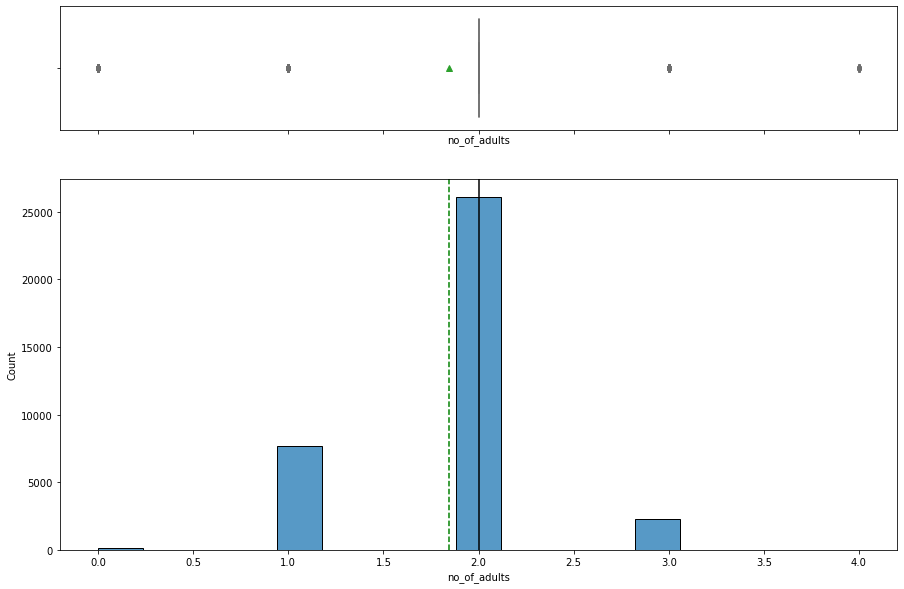

In [20]:
#plotting the boxplot for number of adults
histogram_boxplot(data, "no_of_adults")

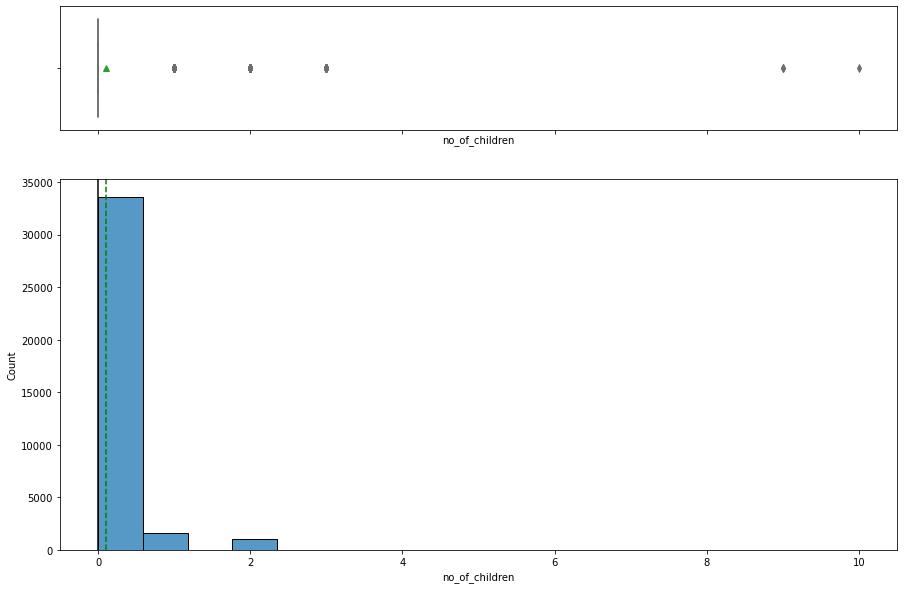

In [21]:
#plotting the boxplot for number of children
histogram_boxplot(data, "no_of_children")

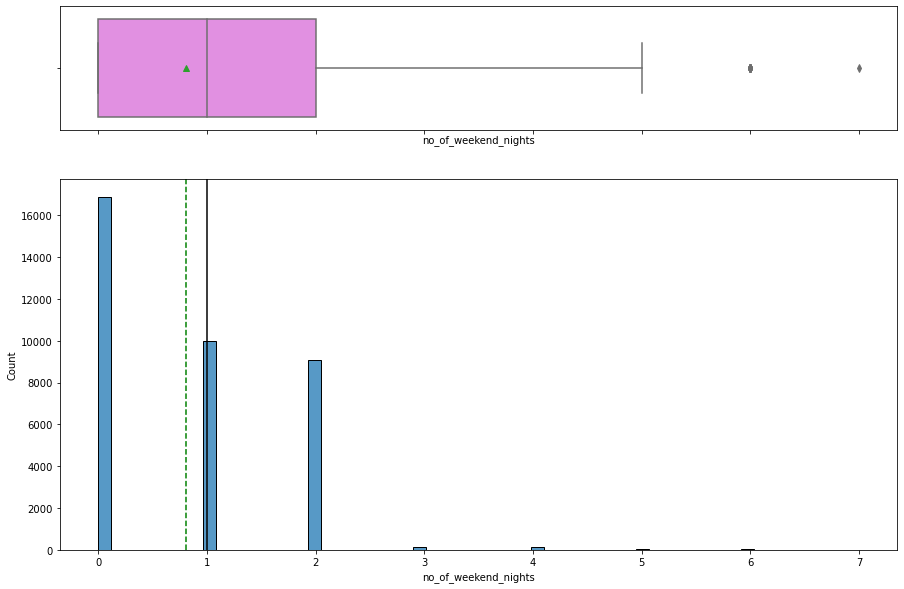

In [22]:
#plotting the boxplot for number of weekend nights
histogram_boxplot(data, "no_of_weekend_nights")

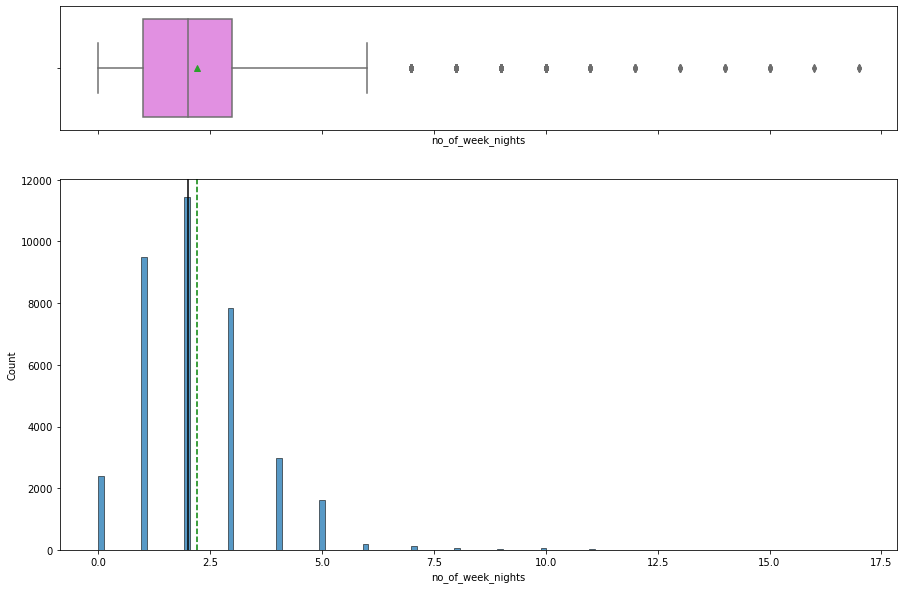

In [23]:
#plotting the boxplot for number of week nights
histogram_boxplot(data, "no_of_week_nights")

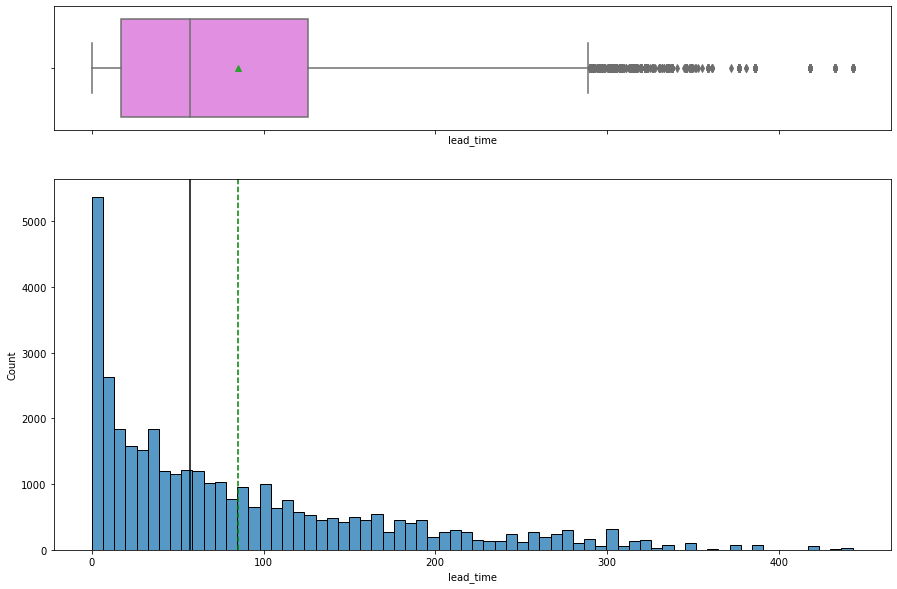

In [24]:
#plotting the boxplot for lead time
histogram_boxplot(data, "lead_time")

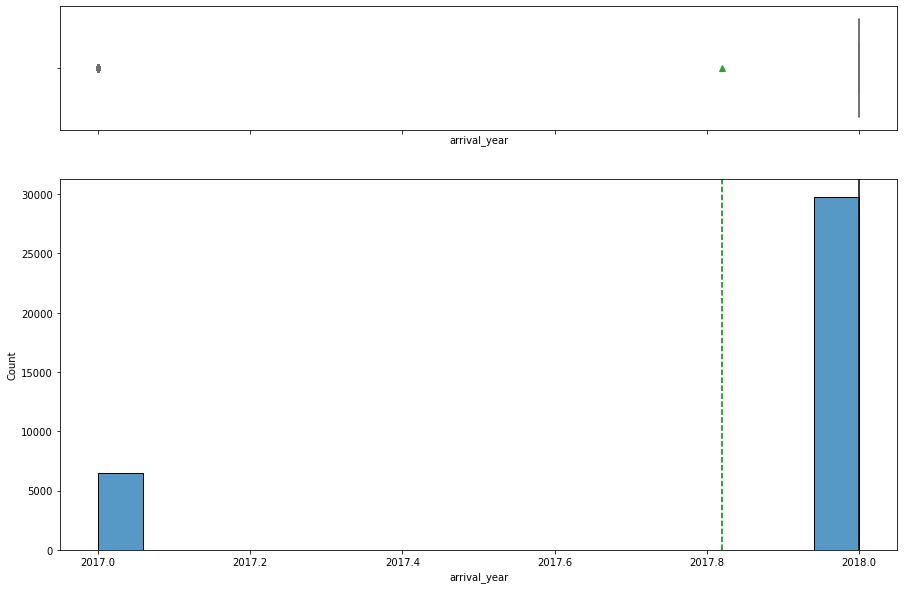

In [25]:
histogram_boxplot(data, "arrival_year")

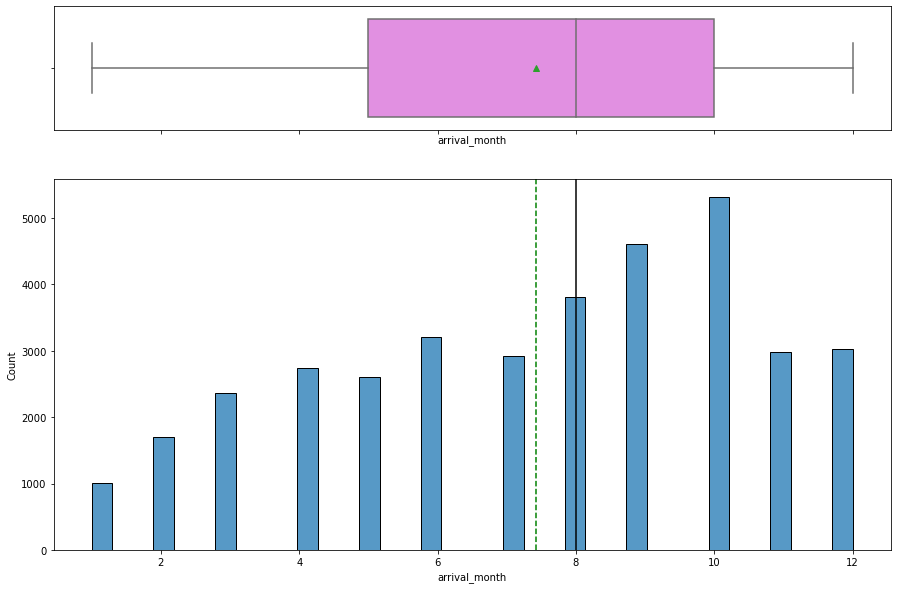

In [26]:
histogram_boxplot(data, "arrival_month")

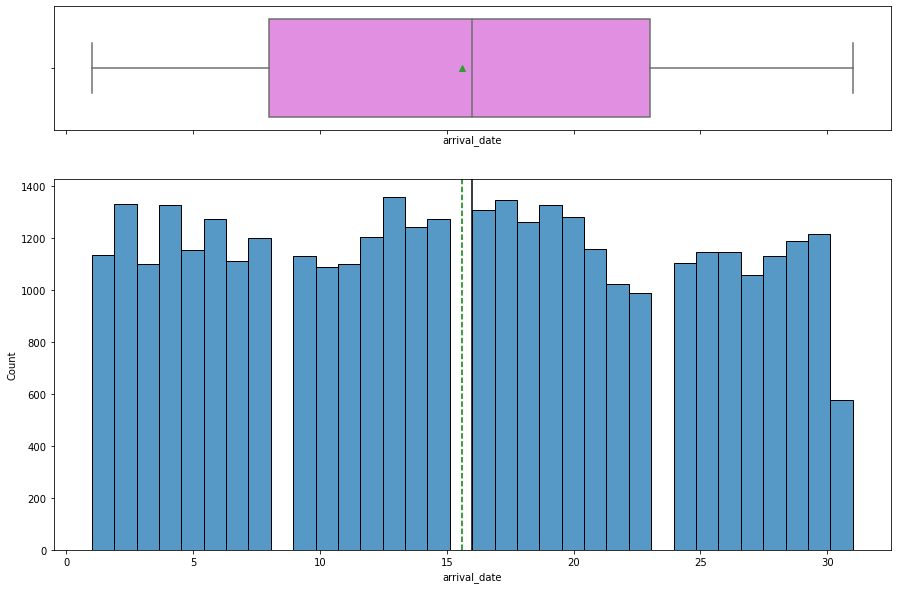

In [27]:
histogram_boxplot(data, "arrival_date")

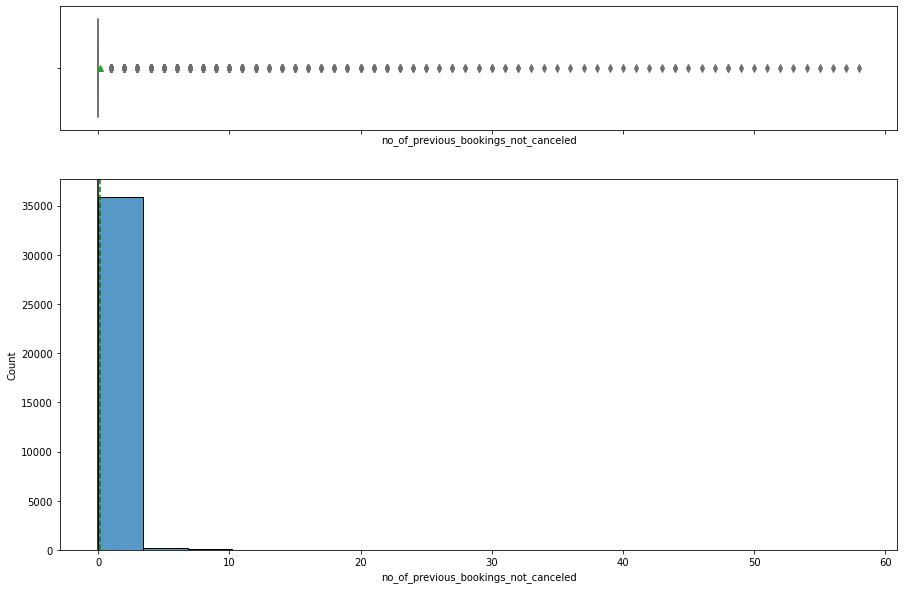

In [28]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

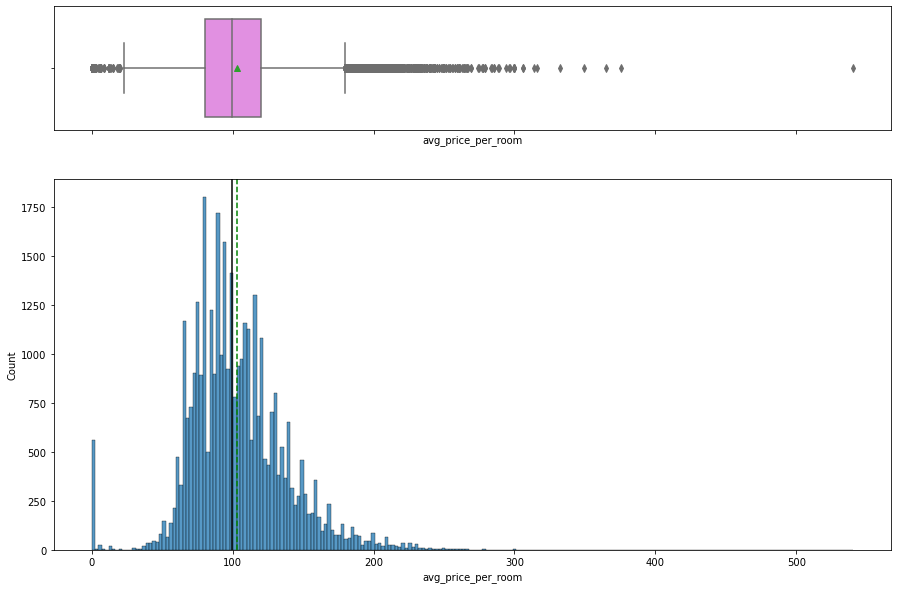

In [29]:
histogram_boxplot(data, "avg_price_per_room")

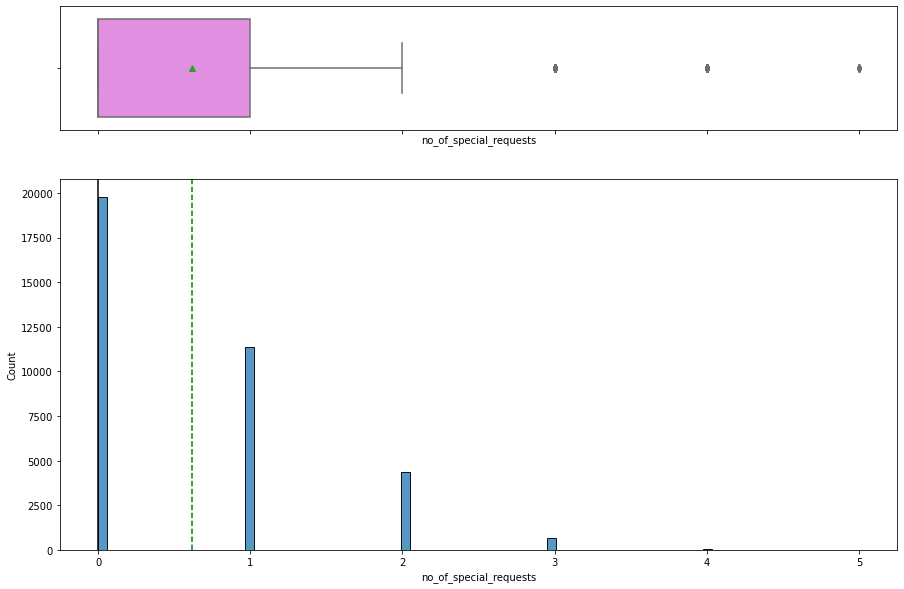

In [30]:
histogram_boxplot(data, "no_of_special_requests")

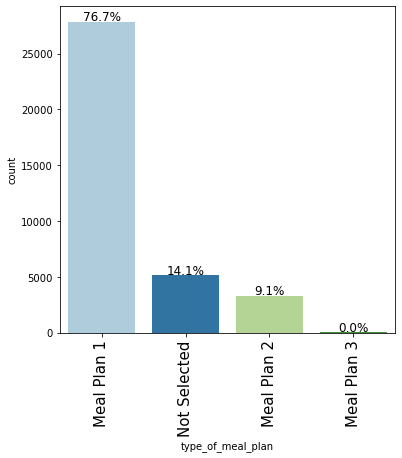

In [31]:
labeled_barplot(df,"type_of_meal_plan",perc=True)

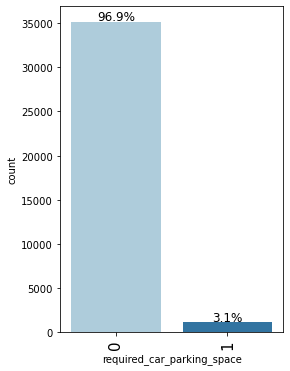

In [32]:
labeled_barplot(df, "required_car_parking_space", perc=True)

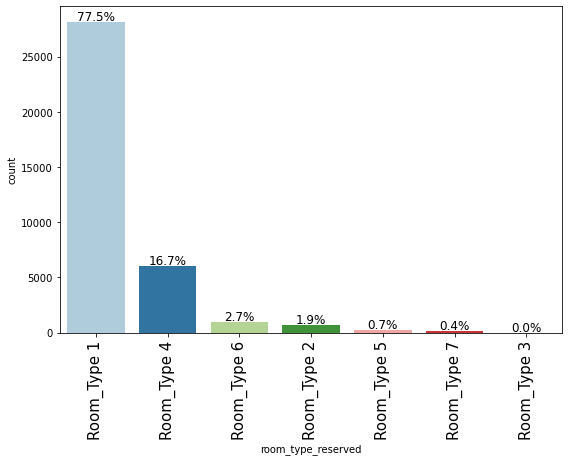

In [33]:
labeled_barplot(df, "room_type_reserved",perc=True)

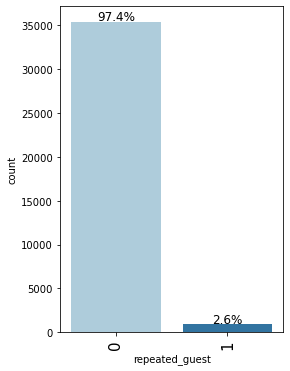

In [34]:
labeled_barplot(df, "repeated_guest",perc=True)

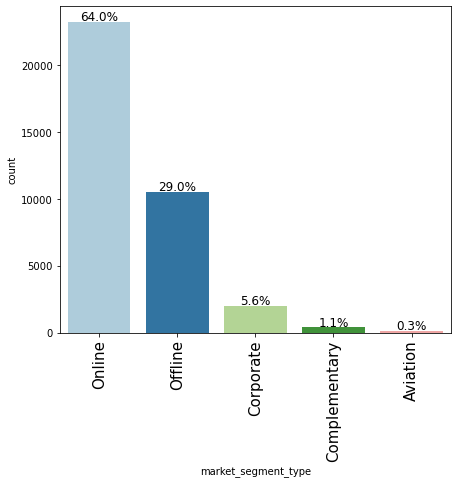

In [35]:
labeled_barplot(df, "market_segment_type",perc=True)

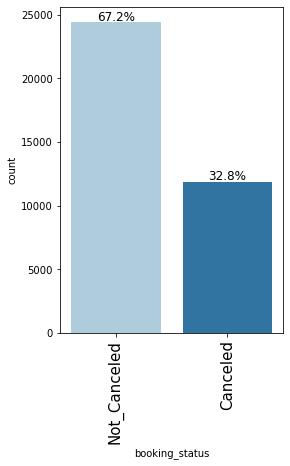

In [36]:
labeled_barplot(df,"booking_status",perc=True)

### Observations from the Univariate analysis
1. Most of the data is skewed and does not have a normal distribution. 
2. The distribution of no of adults is slightly left skewed
3. The distribution for no of children is right skewed with the median being zero
4. There are a lot of outliers in the data set.
5. No of week nights and lead time also shows a right skewed distribution
6. The busiest months at the hotel are October, September, august and june
7. The average price per room is around a hundred dollars
8. Most people do not have speciual requests, but a lot of people usually have one special request while few others have 2,3 or 4 special requests
9. Meal plan 1 is the most selected meal plan. meal plan3 is the least preferred as it has no record of selection
10. Most people do not require parking spaces
11. Room type 1 is the most reserved room type
12. The percentage of repeated guests are very few. 97.4% of them are not
13. The online market segment type is the most prominent, followed by the offline segment.
14. The percentage of bookings canceled are less than half of the bookings not canceled. this shows that the distribution for canceled versus not canceled in not equal, and we cannot rely on the accuracy measure.

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


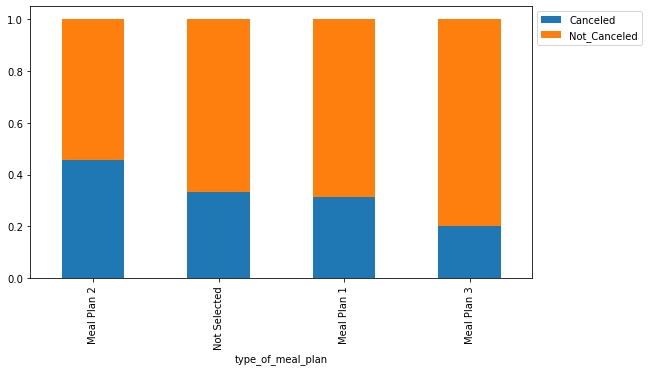

In [37]:
#creating stacked barplots for categorical variables compared to the booking status
stacked_barplot(df, "type_of_meal_plan", "booking_status")

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


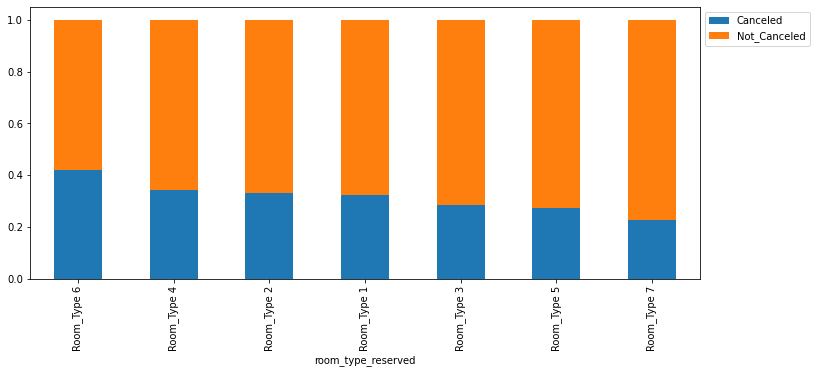

In [38]:
stacked_barplot(df, "room_type_reserved", "booking_status")

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


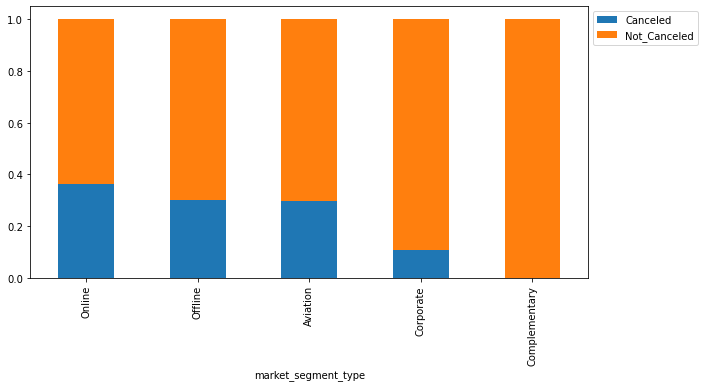

In [39]:
stacked_barplot(df, "market_segment_type", "booking_status")

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


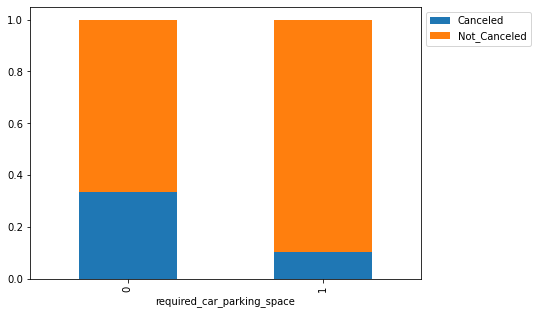

In [40]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


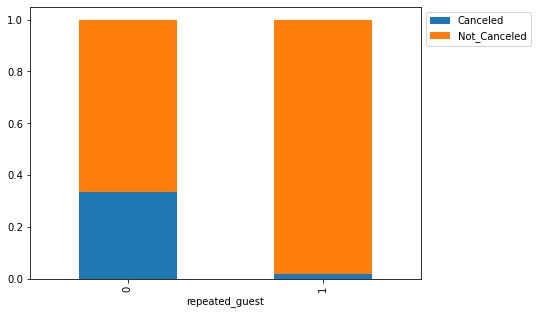

In [41]:
stacked_barplot(df, "repeated_guest", "booking_status")

### Observations from the bivariate analysis
1. The highest fraction of canceled bookings came from customers opted for meal plan 2, while the lowest fraction was from meal plan 3. Meal plan 1 had the most bookings.
2. Room type 1 had the most bookings while room type 3 had the least no of bookings, however, the highest fractions of cancellation is from room type 6 and the least from room type7. 
3. Complementary customer segment never canceled any bookings, which makes sense as they do not pay for the rooms. The online segment has the most cancelations and also the most bookings, followed by the offline segment.This may be because of ease of cancelation and non attachment to the hotel since online customers may not have seen the hotel yet before booking as opposed to offline customers.offline customers are less likely to cancel their bookings, this may be because they walk into the hotel to make the reservations and can get a first hand feel of the rooms and ambience as opposed to online customers For a segment that doesn't make a lot of bookings, the aviation segment cancels a lot as well at a 29.6% cancelation rate. corporate customers cancel the least. 
4. customers who require parking spaces cancel much more than those who do not.
5. The repeated guests barely cancel their bookings. it must be that they enjoy the hotel, hence the decision to repeatedly book it. most bookings and also cancelations come from none repeated guests.


In [42]:
#checking the correlation heat map
#to see the relationship between booking status and the other variables, we need to encode it as 1 and 0
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0\
)

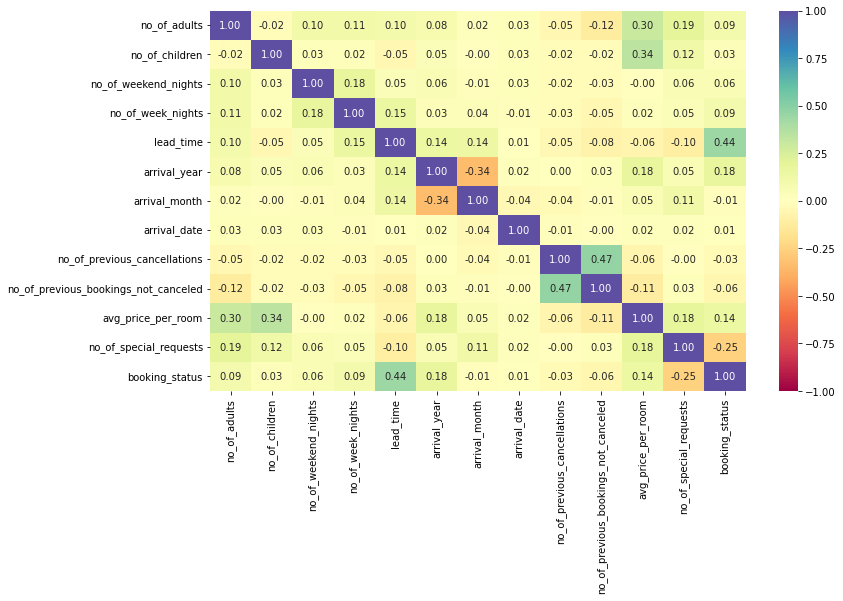

In [43]:
#plotting a correlation heart map
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Observations:
1. There is very little or no correlation between most of the variables and booking status with lead time has the largest correlation with booking status. there is also a very week positive correlation between average price and booking status. 
2. some variables show correlations between each other, e.g no of adults and average price per room, which makes sense because more adults will mean there is a need for a bigger room which would likely cost more. This is also the same case for number of children
3. There is also a positive correlation between the no of previous cancelations and the number of previous bookings not canceled. 
4. Mostly, there are very little or no correlations between all the variables

In [44]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

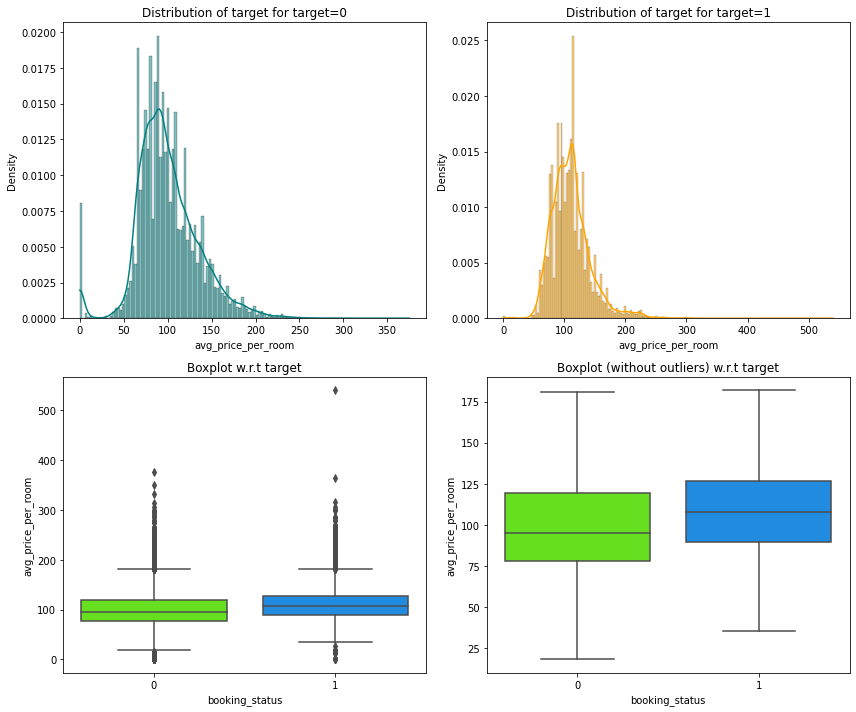

In [45]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

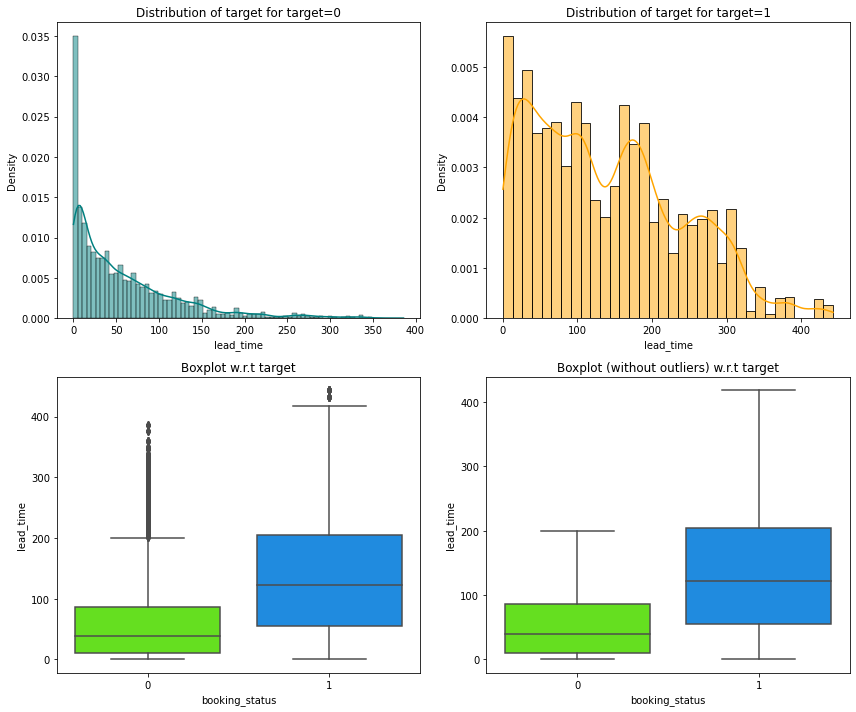

In [46]:
distribution_plot_wrt_target(df, "lead_time", "booking_status")

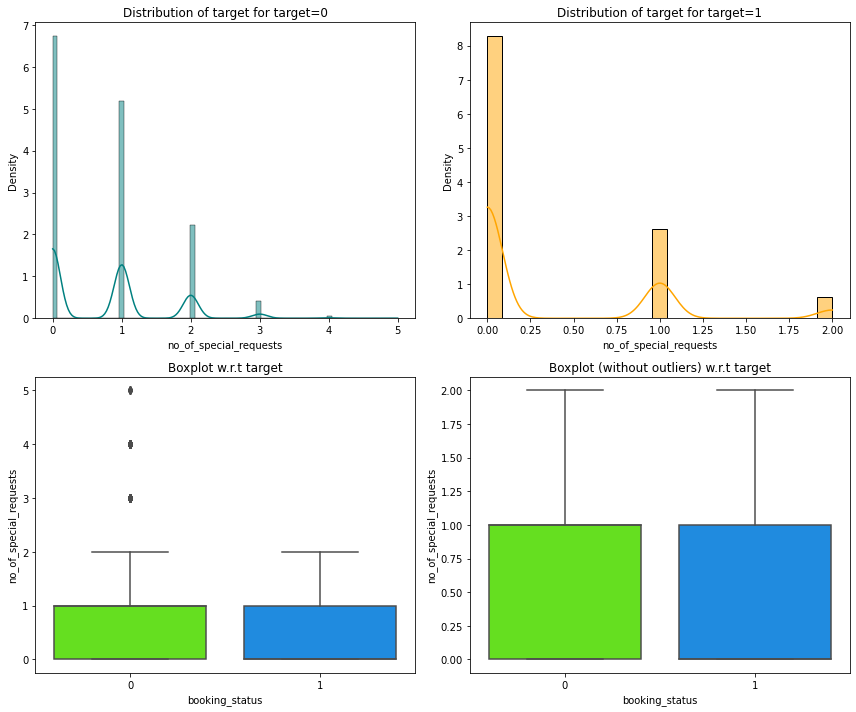

In [47]:
distribution_plot_wrt_target(df, "no_of_special_requests", "booking_status")

Observations from the distribution plots with respect to target
1. the bookings with higher lead time are likely to be canceled. most bookings with lead times of 100 days and below are not canceled.This may be because there is enough time for them to change their minds based on reevaluation of their finances or they might have seen another interesting hotel. The distribution of lead time and canceled bookings in right skewed
2. The bookings are more likely to be canceled when the average price per room is slightly higher. the distribution of average price and canceled bookings is right skewed.
3. When we look at the number of requests with respect to booking status, we also see a right skewed distribution. In the box plot with outliers, it shows that bookings with less special requests are more likely to be canceled than those with more special requests. I would say that this may be due to the fact that people who have multiple special requests may have given a more thorough thought to staying in the hotel.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Question 1

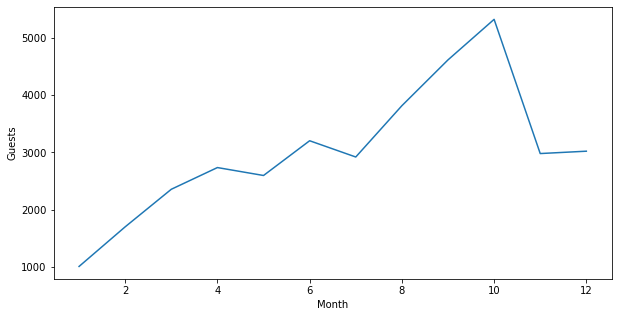

In [48]:
# Checking the arrival months and booking counts
monthly_booking = df.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_booking = pd.DataFrame(
    {"Month": list(monthly_booking.index), "Guests": list(monthly_booking.values)}
)

# plotting it on a line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_booking, x="Month", y="Guests")
plt.show()

Observation:
The busiest month is October

### Question 2

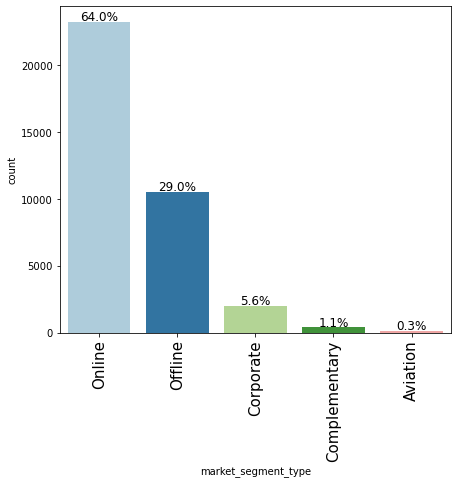

In [49]:
#Creating a labeled barplot to check the market segments and their percentages
labeled_barplot(df, "market_segment_type",perc=True)

Observations:
Most of the customers come form the online market segment

### Question 3

In [50]:
#grouping the market segments by the mean average price per room 
df.groupby('market_segment_type').agg({'avg_price_per_room':'mean'}).sort_values(by='avg_price_per_room',ascending=False).reset_index()

,market_segment_type,avg_price_per_room
0,Online,112.25685
1,Aviation,100.70400
2,Offline,91.63268
3,Corporate,82.91174
4,Complementary,3.14176


### Observation
The average price per room for the online segment is the highest, followed by the aviation segment.
The complementary segment has the least price. the offline and corporate segments have room prices below average

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

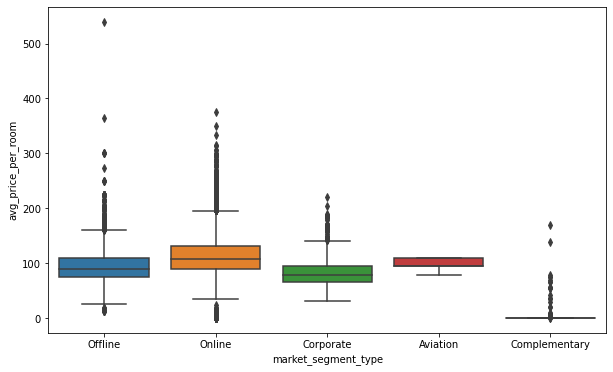

In [51]:
#plotting a boxplot to see the difference in the price per room for different market segments
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,y='avg_price_per_room',x='market_segment_type')

Observations:
1. 50% of the online segment pay more than 100 for a room. 
2. 75% of the complementary market segment do not pay for their room
3. 75% of the online customers pay more than other market segments for their room
4. The highest average price paid for a room was paid by an offline segment customer

### Question 4

In [52]:
#Checking the percentage of bookings that were canceled and not canceled
df['booking_status'].value_counts(normalize=True)

0   0.67236
1   0.32764
Name: booking_status, dtype: float64

Observations: 32.8% of the bookings are canceled.

### Question 5

In [53]:
#Creating a data frame for repeating guests
repeating_guest=df[df.repeated_guest== 1]
repeating_guest['booking_status'].value_counts(normalize=True)

0   0.98280
1   0.01720
Name: booking_status, dtype: float64

Observations: 1.72% of the repeating guests canceled.

### Question 6

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


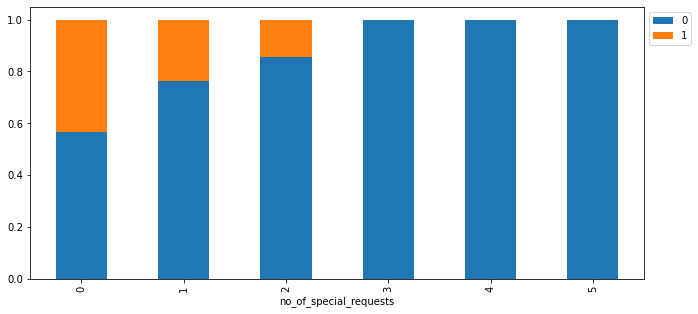

In [54]:
#Checking for patterns between the no of special requests and the booking status
stacked_barplot(df, "no_of_special_requests", "booking_status")

Observation: From this barplot, people who had 0 special requests had the most cancelation rates. The people who had 3 or more special requirements did not cancel.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [55]:
#Checking for missing values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the data set, so we will not be treating missing values.

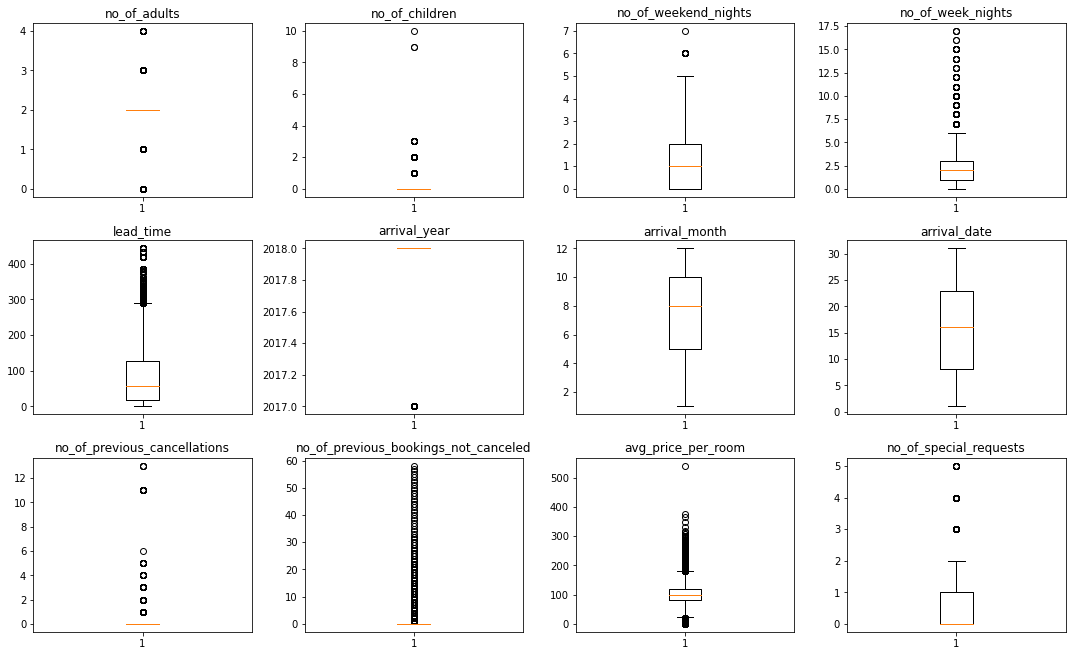

In [56]:
#Checking for outliers in the dataset using boxplot

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observations
Most of the variables in the data set have outliers except the arrival month and arrival date.

However, I will not be treating any outliers in the data set as they seem to be genuine values and might be helpful in creating our model.

## EDA

- It is a good idea to explore the data once again after manipulating it.

Since there are no duplicates and i would not be treating any outliers or engineering any of the features, i will not be re exploring the data

## Preparing the data for modeling

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [58]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [59]:
#defining the independent and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# adding the constant
X = sm.add_constant(X) ## Complete the code to add constant to X 
#Creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1) 

In [60]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64




**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a booking will not fail be canceled but in reality, it is (FN)
- Predicting a booking will be canceled but in reality, it is not (FP)

**Which case is more important?**

- If we predict that a booking will not be canceled but it's canceled in reality, then the company will lose revenue, profit and would have wasted human resources and resourcing on advertising for last minute bookings.

- If we predict that a booking will be canceled but in reality, it's not,it will lead to lack of preparation by the hotel and this will have a ripple effect on their reputation as a hotel and repeatability of customers. They may further get bad reviews and be known for their lack of preparedness.

- Therefore, both cases are important.

**How to reduce the losses?**

The company would want the F1 to be maximized, the greater the Ff1 score, the higher the chances of minimizing both the False Negatives and false positives

## Model building-Logistic Regression

In [61]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                  0.3293
Time:                        19:59:29   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.5923    120.817     -7.653      0.000   -1161.390    -687.795
no_of_adults                             0.1135      

/Users/seyif/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
#Checking the training performance
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80604,0.63422,0.73975,0.68293


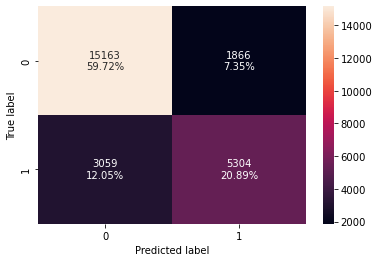

In [63]:
#Checking the confusion matrix for the train set
confusion_matrix_statsmodels(lg, X_train, y_train)

In [64]:
#Checking the test performance
print("Test performance:")
model_performance_classification_statsmodels(lg, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80493,0.63260,0.72882,0.67731


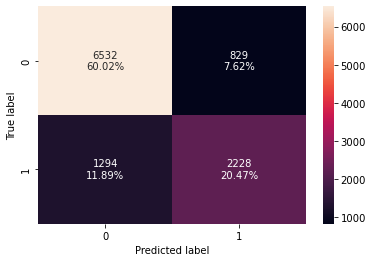

In [65]:
#Checking the confusion matrix for the test set
confusion_matrix_statsmodels(lg, X_test, y_test)

**Observations**

- In the model, we see about 15 variables with negative coefficients, meaning that a unit increase in such variables will decrease the odds of a booking being canceled.
- Other variables which have positive co-efficients will cause the odds of cancelation to increase if a unit increase is observed.
- The f1_score of the model for train is 0.68293 and for test it's 0.67723 for the test, which is pretty decent but we will try to maximize it further
- Accuracy and recall are also similar in both the training and testing data, but we will try to improve the overall model. Accuracy is about 80% on both train and test and recall is about 63% on both. 

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values. we will chek the VIF and pvalues shortly

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

We will try to detect Multicolinearity using the Variation Inflation Factor (VIF).

Going by the general rule of thumb,

  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [66]:
#Checking the VIF of all the variables
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1.27218
required_car_parking_space_1                  1.03993
room_type_reserved_Room_Type 2                1

### Observation: 
- The variables with high VIF values are dummy variables. 
- They also have high p-values, so i will ignore them now and drop them while dropping the variables with high p values. 
- I will create a for loop to drop all variables with pvalue > 0.05 one after the other

In [67]:
### creating a loop for Removing the variables with high P-values
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/Users/seyif/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'repeated_guest_1']


In [68]:
#creating a new training set will only selected features after removing high pvalues
X_train2 = X_train[selected_features]

In [69]:
## Building the Logistic Regression model with the new training set
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2= logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                  0.3283
Time:                        19:59:30   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615      0.000   -1153.376    -681.196
no_of_adults                       0.1086      0.037      2.914      0.

* Now all the columns left are significant predictors, let's check the model performance and make interpretations.

In [70]:
#I will now convert the coefficients to odds by taking the exponential of the coefficients and then find the percentage change in odds.
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,required_car_parking_space_1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_1
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,1.01584,1.57324,0.95853,1.25716,1.01935,0.22994,1.17992,1.33089,0.20305,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750,0.06480
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,1.58352,57.32351,-4.14725,25.71567,1.93479,-77.00595,17.99156,33.08924,-79.69523,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963,-93.52026


### Coefficient interpretations 

- No_of_adults: Holding all other features constant, a unit change in no_of_adults will increase the odds of a person canceling their booking by 1.114 times or a 11.47% increase in the odds of canceling the booking.
- no_of_children: Holding all other features constant, a unit change in no_of_children will increase the odds of a person canceling their booking by 1.1644 times or a 16.44% increase in the odds of canceling the booking.
- No_of_weekend_nights: Holding all other features constant, a unit change in No_of_weekend_nights will increase the odds of a person canceling their booking by 1.11475 times or a 11.48% increase in the odds of canceling the booking.
- lead_time: Holding all other features constant, a unit change in lead_time will increase the odds of a person canceling their booking by 1.01584 times or a 1.58 % increase in the odds of canceling the booking.
- arrival_year: Holding all other features constant, a unit change in arrival_year will increase the odds of a person canceling their booking by 1.57324 times or a 57.32% increase in the odds of canceling the booking.
- arrival_month: Holding all other features constant, a unit change in arrival_month will decrease the odds of a person canceling their booking by 0.95853 times or a 4.15% decrease in the odds of canceling the booking
- special_requests: Holding all other features constant, a unit change in special_requests will decrease the odds of a person canceling their booking by 0.22994 times or a 77.01% decrease in the odds of canceling the booking


- In Summary, all positive coefficients mean that an increase in the variable will lead to an increase in the chances of the hotel booking being cancelled, while the negative coefficient variables such as arrival month, the number of special requests,required parking space 1,room types 2,4,5,6 and 7,the market segments for Corporate and Offline and being a repeated guest  means that an increase  will lead to decrease in chances of a hotel booking being cancelled.



## Model performance evaluation on the final model

### Checking the performance of the new model

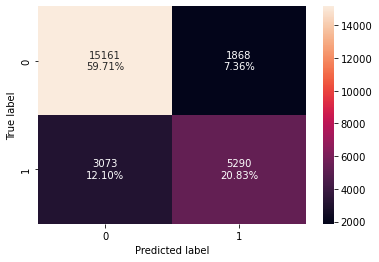

In [71]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [72]:
#Checking the training set performance
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


In [73]:
#Checking the test set performance
#First we need to drop the columns that were dropped in the train set
X_test2= X_test[list(X_train2.columns)]

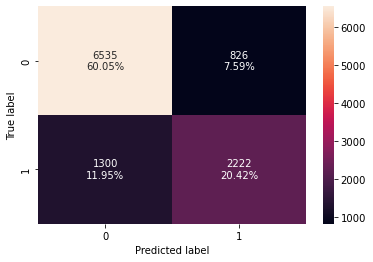

In [74]:
# creating confusion matrix for the test set
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [75]:
#Checking the performance of the final model on the test set
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


- The model is giving a f1_score of 0.682 and 0.676 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- So far, we have a good model, however we can check further to see if we get a model with much better scores.

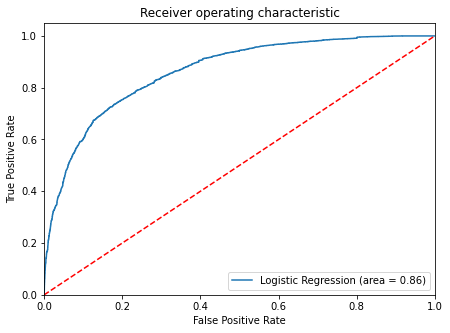

In [76]:
#Checking the ROC-AUC on training set in order to get an optimal threshold
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observation: The logistic regression model is giving a good performance on training set

In [77]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37104666234891487


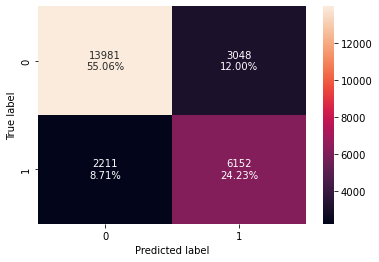

In [78]:
#Checking this model on training set using the optimal threshold as gotten from the AUC-ROC curve
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [79]:
# checking model performance for this model on the train set
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


Observation: Precision of model has decreased but the Recall and the f1 score have improved.
The model is still giving a good performance

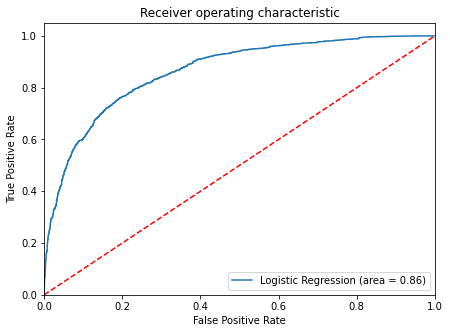

In [80]:
#Checking the model on the test set
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

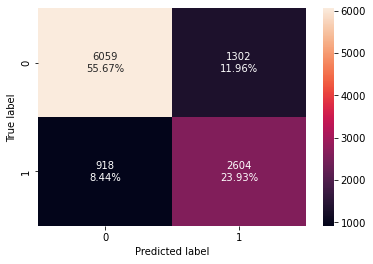

In [81]:
# creating confusion matrix for the test set
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [82]:
# checking model performance for this model on the test set.
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


Observations:
    The F1 score has improved in the test set
    The model is giving a much better performance
    

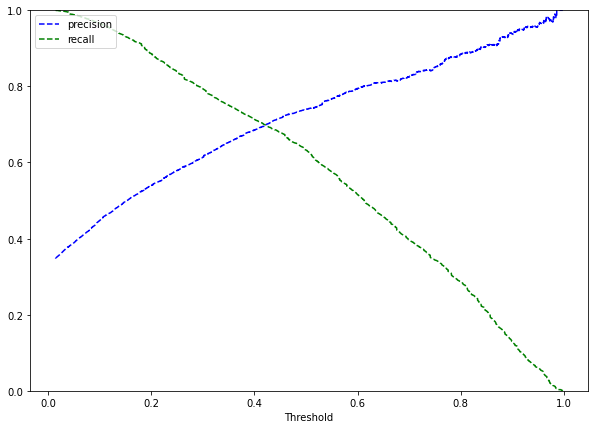

In [83]:
#Using precision-recall curve to try to get a better threshold
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

Observation: At the threshold 0.42, we get balanced recall and precision

In [84]:
# setting the threshold
optimal_threshold_curve = 0.42

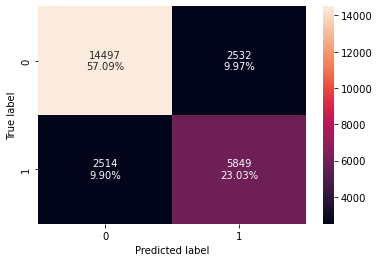

In [85]:
# creating confusion matrix for the training set
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [86]:
#Checking the model performance on the training data
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69939,0.69789,0.69864


* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42 as the optimal threshold.

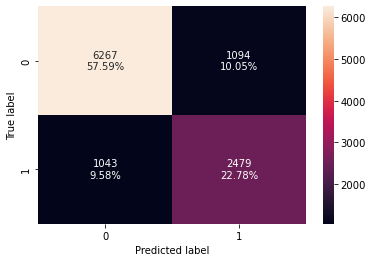

In [87]:
#Checking the model on the testing set
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [88]:
#Checking the performance on the testing model
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


## Model Comparison and final model selection

In [89]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80541,0.79289,0.80128
Recall,0.63255,0.73562,0.69939
Precision,0.73903,0.66870,0.69789
F1,0.68166,0.70056,0.69864


In [90]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79601,0.80364
Recall,0.63089,0.73935,0.70386
Precision,0.72900,0.66667,0.69381
F1,0.67641,0.70113,0.69880


### Conclusion:
Almost all the three models are performing well on both training and test data without the problem of overfitting
The model with the ROC-AUC threshold (0.37) is giving the best F1 score. Therefore it can be selected as the final model

- The variables that contribute to cancelations are those with positive coeffircients, while the variables contributing to no cancelations are those with negative coefficients.


## Building a Decision Tree model

In [91]:
# specifying the independent  and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

#creating the functions to calculate different metrics and confusion matrix 
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [92]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [93]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [94]:
#fitting the decision tree on training data
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

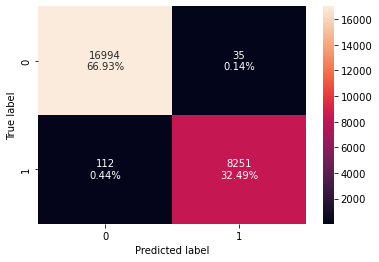

In [95]:
#checking confusion matrix on the training set
confusion_matrix_sklearn(dtree,X_train,y_train)

In [96]:
#Checking the performance on the training set
decision_tree_perf_train = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


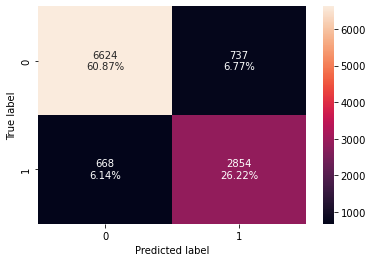

In [97]:
#Checking performance on the test set
#creating the confusion matrix for the test set
confusion_matrix_sklearn(dtree,X_test,y_test)

In [98]:
#Checking the performance on the testing set
decision_tree_perf_test = model_performance_classification_sklearn(
    dtree, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87090,0.81034,0.79476,0.80247


In [99]:
#Visualizing the first decision tree
#printing out the feature names
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'repeated_guest_1']


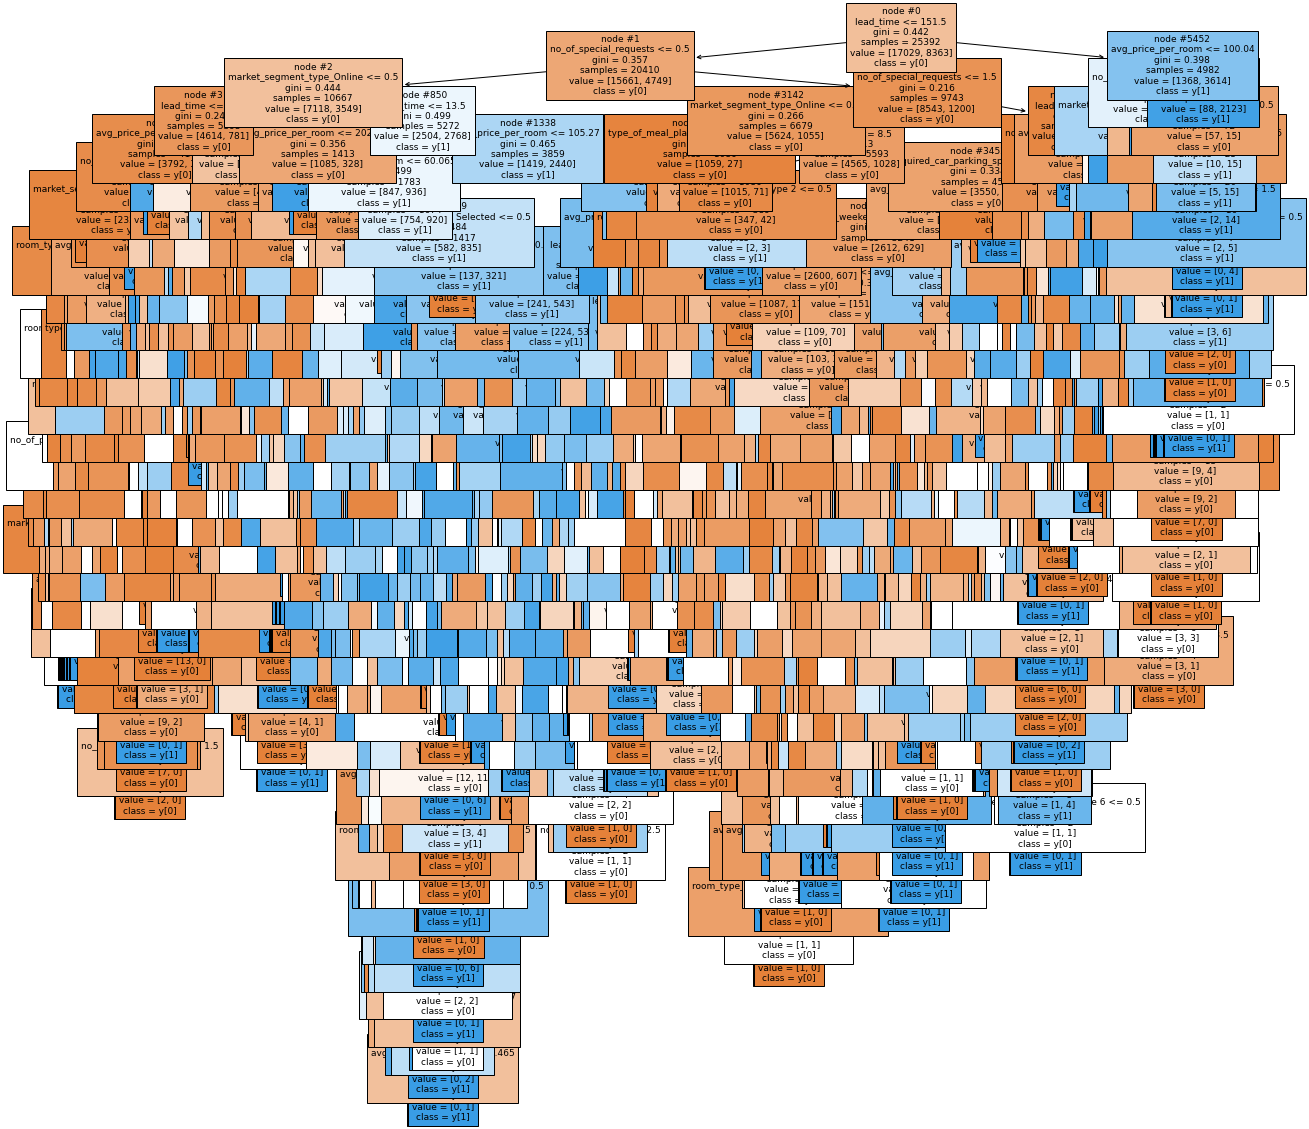

In [100]:
plt.figure(figsize=(20, 20))
tree.plot_tree(
    dtree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [101]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dtree, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest_1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest_1 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_

## Do we need to prune the tree?

**The decision tree is very complex.
It will definitely be overfitting and would need to be pruned**

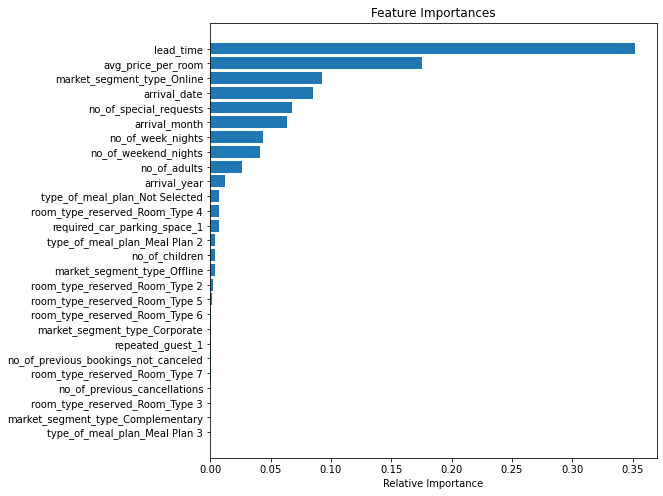

In [102]:
#Checking important features before pruning
feature_names = list(X_train.columns)
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [103]:
#Prepruning the tree using Grid search
# Choosing the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Running the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fitting the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

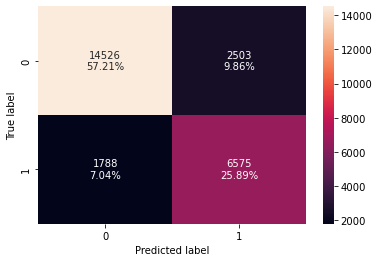

In [104]:
#Checking the performance on the training set
#creating a confusion matrix for the training set
confusion_matrix_sklearn(estimator, X_train, y_train)

In [105]:
#Checking the performance on the trainingset
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) 
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83101,0.78620,0.72428,0.75397


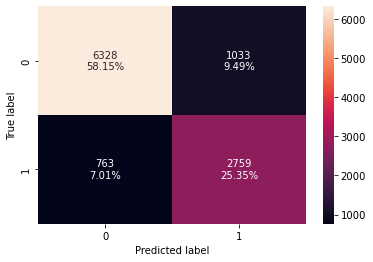

In [106]:
#Checking the performance on the testing set
#Creating a confusion matrix for the test set
confusion_matrix_sklearn(estimator, X_test, y_test)

In [107]:
#Checking the performance on the testing set
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


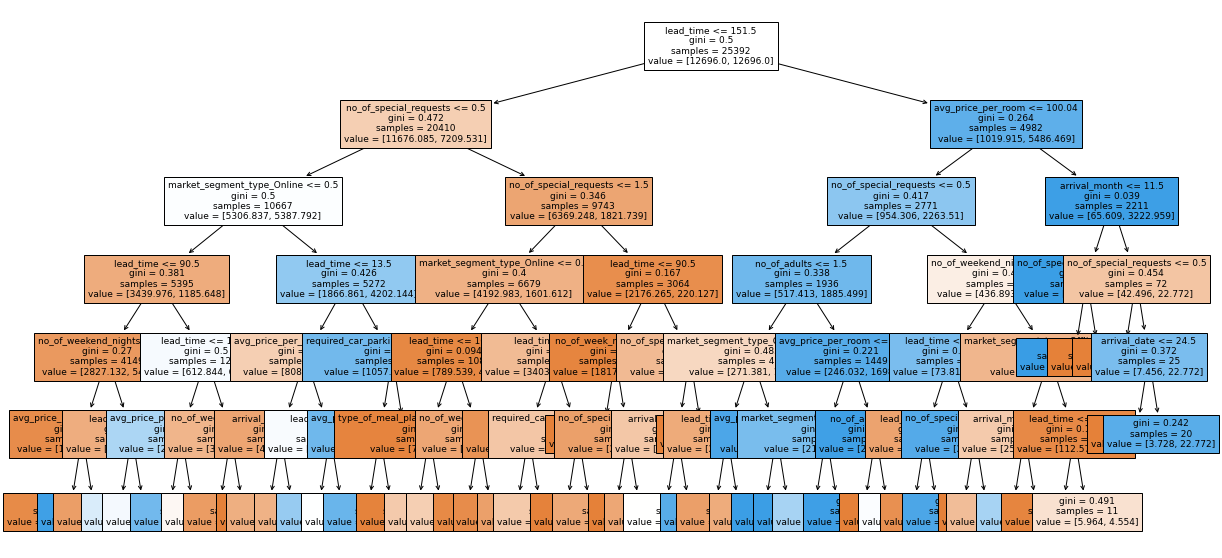

In [108]:
#Visualizing the Decision tree after pre pruning
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [109]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

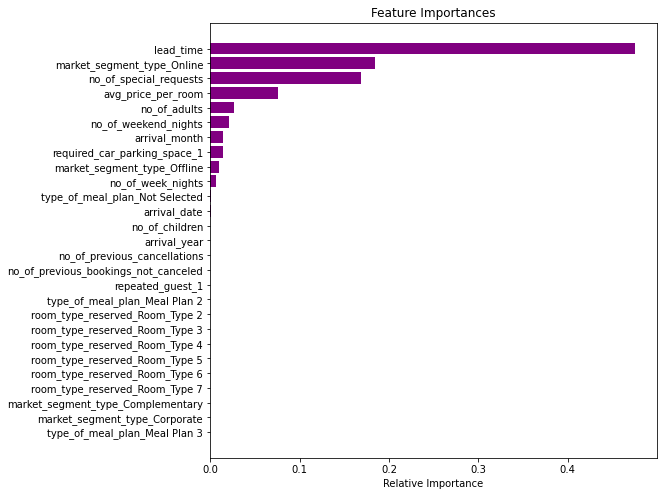

In [110]:
# checking the importance of the features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations: 
- The pre-pruned tree is much less complex than the first decision tree with depth of 6. 
- Lead time and market_segment_type_online are the most important features in this tree.

### Post pruning using Cost complexity Pruning


In [111]:
#checking the ccp values and impurities
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [112]:
#returning the alphas and corresponding leaf impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,-0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1893,0.00890,0.32806
1894,0.00980,0.33786
1895,0.01272,0.35058
1896,0.03412,0.41882


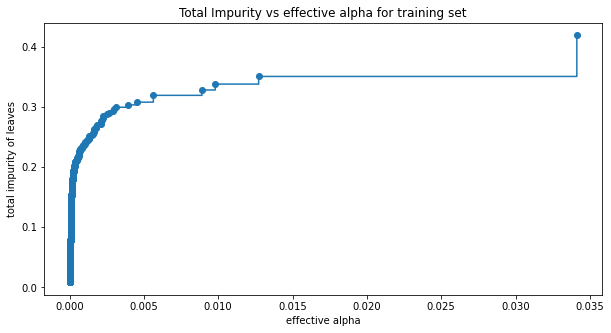

In [113]:
#creating a plot to check the impurities and alpha for the training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [114]:
## Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [115]:
#creating a loop to find the number of nodes in the last tree and the corresponding ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train) ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137182


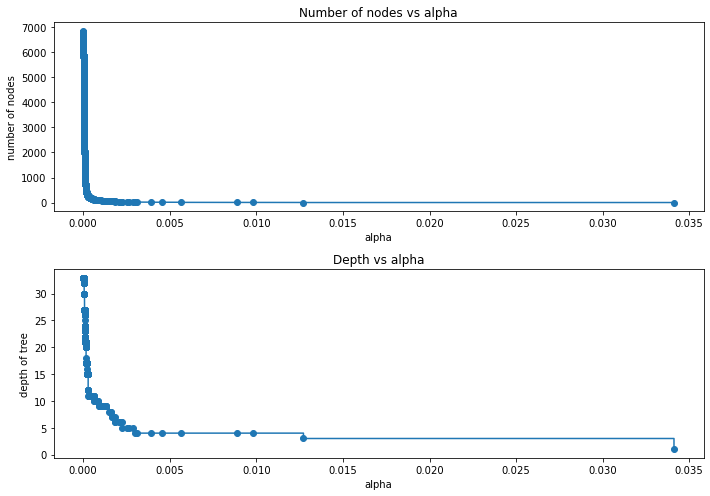

In [116]:
#For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
#Here we show that the number of nodes and tree depth decreases as alpha increases.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1 Score vs alpha for training and testing sets

In [117]:
#F1 scores for the training set
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)
#F1 scores for the testing set
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

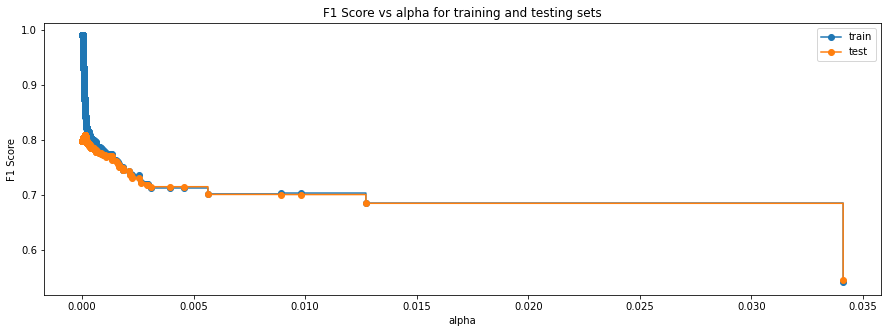

In [118]:
#Plotting the f1 scores vs alpha for both training and testing sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [119]:
#getting the best model with the highest f1 score in the train and test set
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167015,
                       class_weight='balanced', random_state=1)


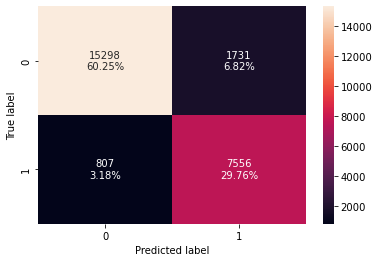

In [120]:
##Checking performance on training set
#confusion matrix for train set
confusion_matrix_sklearn(best_model, X_train, y_train)

In [121]:
#checking model performance on the train set
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90005,0.90350,0.81361,0.85620


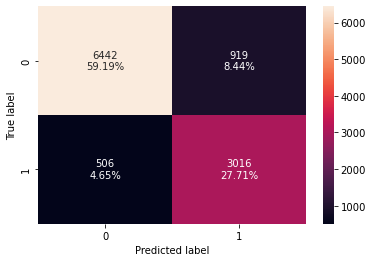

In [122]:
##Checking performance on testing set
#Confusion matrix for test set
confusion_matrix_sklearn(best_model, X_test, y_test)

In [123]:
#Checking model performance on the test set
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86906,0.85633,0.76645,0.80890


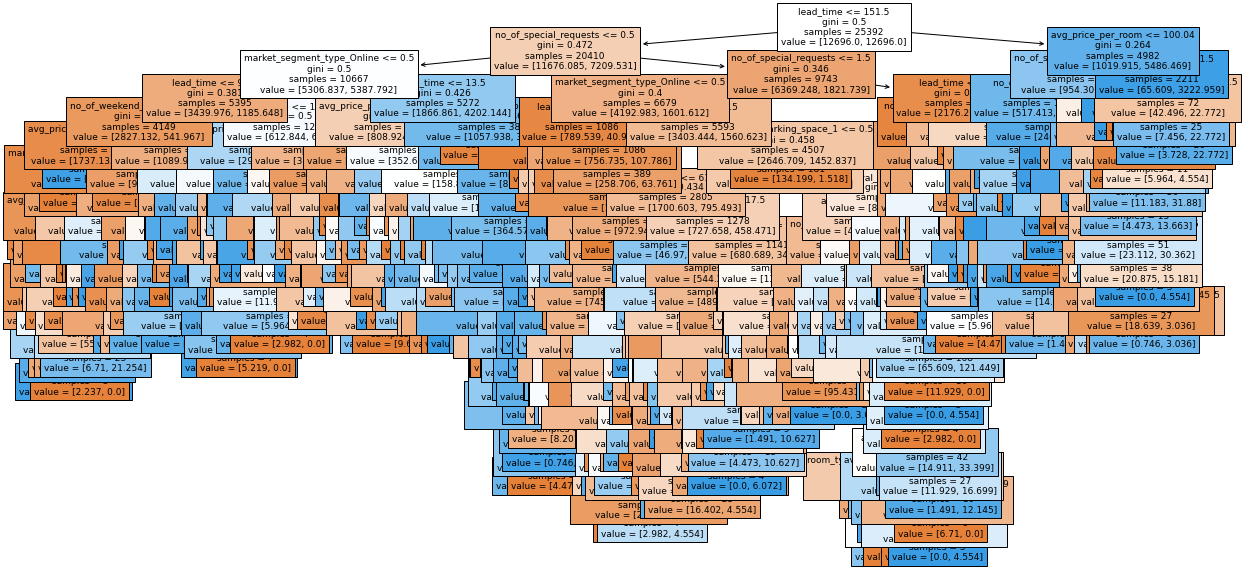

In [124]:
#Visualizing the decision tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [125]:
#getting the text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

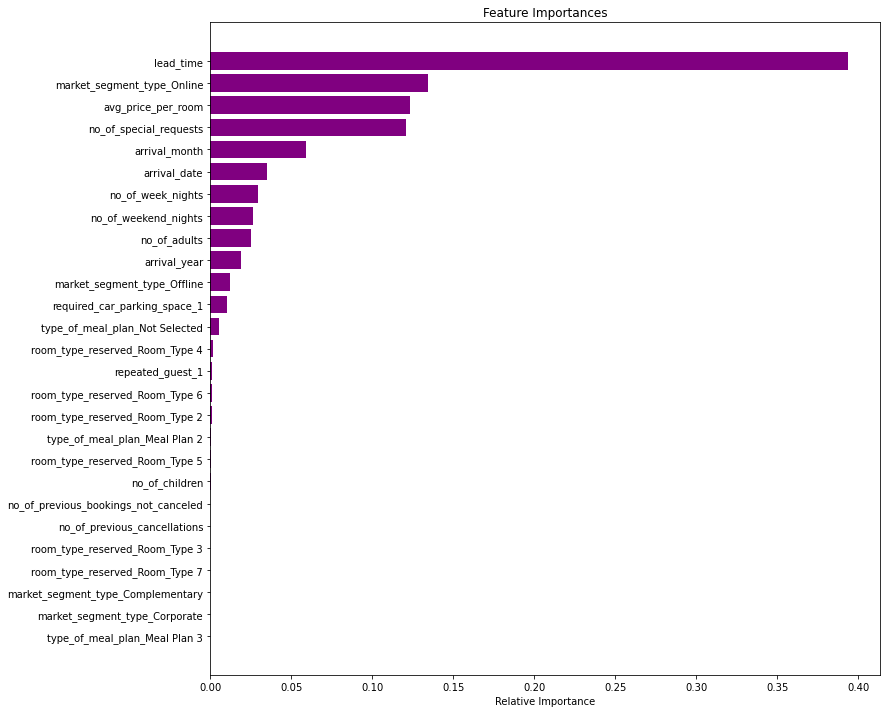

In [126]:
#checking the importance of features on the post pruned decision tree
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Observations: 
The post pruned tree is more comple than the pre pruned tree but still much less complex than the first decision tree.
Here, the important features still remain lead time and market segment type online.

## Model Performance Comparison and Conclusions

In [127]:
# comparing the decision tree models
#training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.83101,0.90005
Recall,0.98661,0.78620,0.90350
Precision,0.99578,0.72428,0.81361
F1,0.99117,0.75397,0.85620


In [128]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.87090,0.83497,0.86906
Recall,0.81034,0.78336,0.85633
Precision,0.79476,0.72758,0.76645
F1,0.80247,0.75444,0.80890


#### Conclusions from the Decision Tree Model
- The three Decision tree models are giving high F1 scores on both training and test sets. 
- The pre pruning tree has the lowest performance in general as compared to the other 2 trees.
- However, the pre-pruned tree is giving a decent F1 score on both tests and the testing scores and training scores are much closer than the other 2, showing that there is no overfitting in the model.
- Inn Hotels should consider these when picking a decision tree model to use.




### Comparing the decision tree model to the logistic regression model

- From our best logistic model at threshold 0.37, our Accuracy was 0.79289, recall was 0.73562, precision was 0.66870 and F1 score 0.70056 on the training data set. this is much lower than what we got using the decision tree. 
- The decision tree models seem to be more accurate and precise with higher recall and F1 score across the training and testing data sets.

## Actionable Insights and Recommendations

### InnHotels can implement one or more of these policies for cancellation and refund 

- Inn Hotels can implement a cancellation policy in which the customer pays a percentage of the average room rate if the booking is canceled within a certain timeframe before arrival dates. e.g 10% if they cancel a month to arrival

- They could also choose to have a gradient cancellation payment structure which can be calculated using the average lead time of canceled bookings which is about 95 days. e.g, they can charge 10% for cancelations a month to arrival, 20% for 3 weeks to arrival, half price for cancelations made  2 weeks to arrival and full price if the customer cancels about 3 days to arrival since preparations would have been made. 

- In addition, they could consider a no refund policy for bookings can be implemented where the customers may be allowed to shift their datel before a certain number of days to arrival, but not outrightly cancel their booking.

- For online customers, the hotel can charge a non-refundable booking fee which will be deductable from the average room price when they follow through with their booking.

- Alternatively, the hotel can include a clause for online bookings which could state that rooms will be unreserved after a certain period of time if payment is not made, and that they will need to reconfirm availablity of the room type before rebooking.  

- Because customers are more likely to cancel a booking on a higher priced room, they can add free services like free breakfast, laundry or hotel spa treatments that are accessible if the customer comes through with their booking. To do this however, Inn Hotels will also need to get more information on the competitions pricing, so that they ensure competitive prices for customer retention and have an assurance of profit. value for money 
 

- We saw in the exploratory data analysis that most bookings were made in August to December. We also observed high number of cancelations in these same months and this could be due to the hotel being fully booked at those times. The hotel can encourage booking for less busy months either by coming up with a fun summer/spring schedule, loaded witha ctivities that will attract customers. they could also offer discounts on their room rates and encourage customers to pay in advance, but this should come after careful consideration of the cost.
 
- The corporate market segment has less likely chances of cancelations, possibly because business trips are usually fixed much ahead of time and they usually follow through. INN hotel can look at partnering with corporations and businesses to get them to make them their preferred hotel. They can encourage them to make upfront payments for their business trip bookings around their location and offer benefits for doing so.
 
- Since customers who book room type1 usually cancel and room type 3 is seldom booked, the hotel needs to do more research to ascertain why this is so.  it could be for reasons such as poor quality of the online pictures,lack of complementary service, a poor view from the room, etc. They will need to research thoroughly on why this is happening. They could offer these rooms at a discount for a period of time and get feedback from the customers who stayed in these rooms, to get some more insights on what to do better.

- Since repeated guests are less likely to cancel, the hotel can offer special services or discounts solely for their repeated guests eg meal plan upgrades, free room upgrades, free parking spaces etc, to encourage retention and conversion. Another good way to ensure that customers keep coming is by having referral benefits where customers who refer others can get a discount on their next booking. this will help ensure repeatedness of their customers while also saving some cost of advertising.